In [224]:
import pandas as pd

In [225]:
df = pd.read_csv('salary.csv', delimiter=';')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [227]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [228]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [229]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

YearsExperience    0.0
Salary             0.0
dtype: float64

In [230]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [231]:
X = df['YearsExperience']
y = df['Salary']

## Problema de predição

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
f'X train length: {len(X_train)}, X test length: {len(X_test)}, y train length: {len(y_train)}, y test length: {len(y_test)}'

'X train length: 24, X test length: 6, y train length: 24, y test length: 6'

In [235]:
X_train.head()

28    10.3
24     8.7
12     4.0
0      1.1
4      2.2
Name: YearsExperience, dtype: float64

In [236]:
X_test.head()

27    9.6
15    4.9
23    8.2
17    5.3
8     3.2
Name: YearsExperience, dtype: float64

In [237]:
from sklearn.preprocessing import PolynomialFeatures

In [238]:
polynomialFeatures = PolynomialFeatures(degree=2)

In [239]:
X_poly_train = polynomialFeatures.fit_transform(X_train.values.reshape(-1, 1))
X_poly_test = polynomialFeatures.transform(X_test.values.reshape(-1, 1))

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
regressor = LinearRegression()

In [242]:
regressor.fit(X_poly_train, y_train)

LinearRegression()

In [243]:
y_pred = regressor.predict(X_poly_test)

In [244]:
from sklearn.metrics import mean_squared_error, r2_score

In [245]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [246]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 52527916.36877499, R^2 Score: 0.897164578089087'

In [247]:
import matplotlib.pyplot as plt

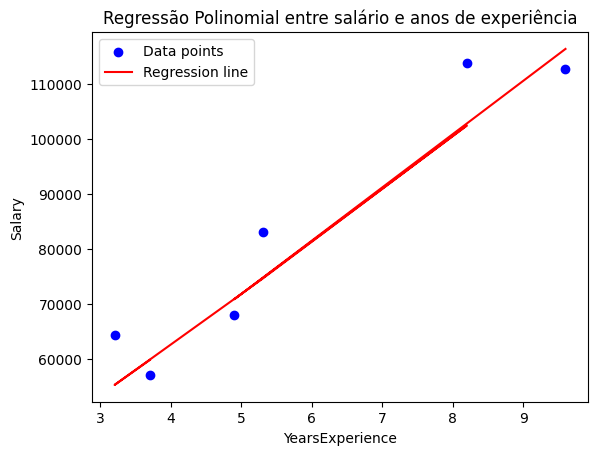

In [248]:
plt.scatter(X_test, y_test, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Regressão Polinomial entre salário e anos de experiência')
plt.legend()
plt.show()

## Problema de representação

In [249]:
X = df['YearsExperience']
y = df['Salary']

In [250]:
polynomialFeatures = PolynomialFeatures(degree=3)

In [251]:
X_poly = polynomialFeatures.fit_transform(X.values.reshape(-1, 1))

In [252]:
regressor.fit(X_poly, y)

LinearRegression()

In [253]:
y_pred = regressor.predict(X_poly)

In [254]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [255]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 26446769.60683776, R^2 Score: 0.9635969766249464'

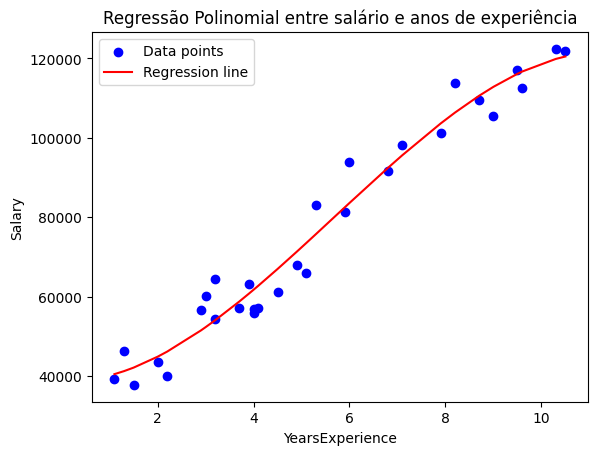

In [256]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Regressão Polinomial entre salário e anos de experiência')
plt.legend()
plt.show()

## Outro problema de representação

Base salary2.csv

In [257]:
df = pd.read_csv('salary2.csv', delimiter=';')

In [258]:
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [260]:
df.isna().sum()

Level     0
Salary    0
dtype: int64

In [261]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

Level     0.0
Salary    0.0
dtype: float64

In [262]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [263]:
X = df['Level']
y = df['Salary']

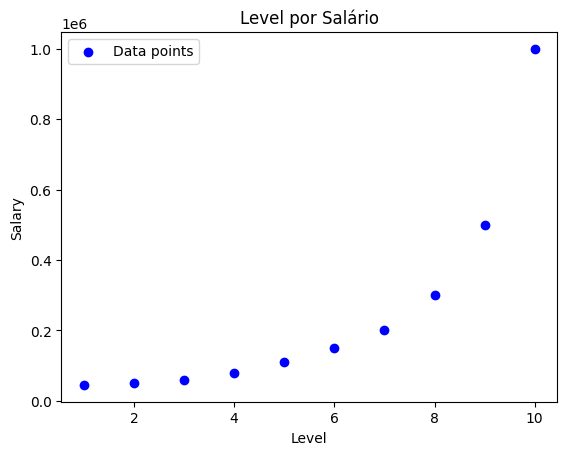

In [264]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Level por Salário')
plt.legend()
plt.show()

In [265]:
polynomialFeatures = PolynomialFeatures(degree=4)

In [266]:
X_poly = polynomialFeatures.fit_transform(X.values.reshape(-1, 1))

In [267]:
regressor.fit(X_poly, y)

LinearRegression()

In [268]:
y_pred = regressor.predict(X_poly)

In [269]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [270]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 210343822.84381685, R^2 Score: 0.9973922891706614'

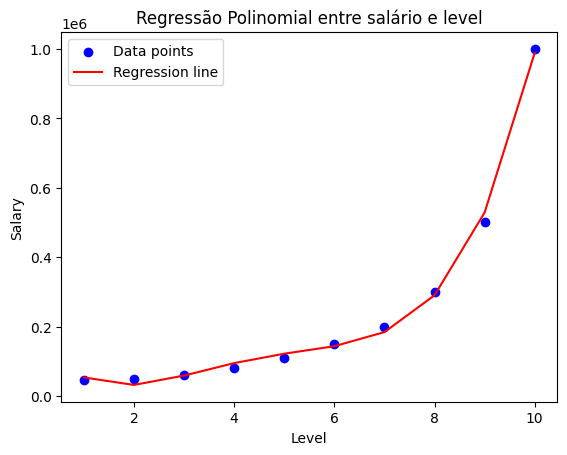

In [271]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Regressão Polinomial entre salário e level')
plt.legend()
plt.show()